# Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

Adapted from *Jake VanderPlas* http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

*University of Washington eScience Institute*

Uses data from [Fremont Bike Counter.](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k)

## Part 1: Loading and Visualizing Data

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1092073c8>)

In [3]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
01/31/2019 11:00:00 PM,7,6
01/31/2019 10:00:00 PM,13,16
01/31/2019 09:00:00 PM,18,27
01/31/2019 08:00:00 PM,32,33
01/31/2019 07:00:00 PM,40,94
01/31/2019 06:00:00 PM,68,246
01/31/2019 05:00:00 PM,106,399
01/31/2019 04:00:00 PM,84,219
01/31/2019 03:00:00 PM,60,97


In [4]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)

In [5]:
data.shape

(55488, 2)

In [6]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-31 23:00:00,7.0,6.0
2019-01-31 22:00:00,13.0,16.0
2019-01-31 21:00:00,18.0,27.0
2019-01-31 20:00:00,32.0,33.0
2019-01-31 19:00:00,40.0,94.0


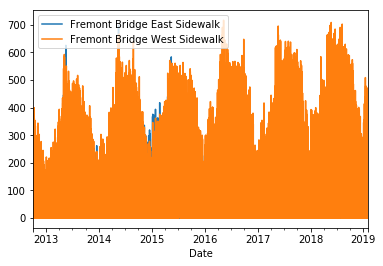

In [7]:
%matplotlib inline
data.plot();

This is very busy, so let's look at weekly sums.

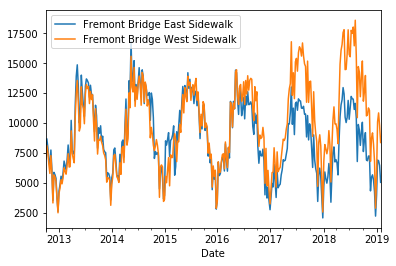

In [8]:
data.resample('W').sum().plot();

In [9]:
data.describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,55479.000000,55479.000000
mean,52.431316,58.315272
std,67.826311,84.737058
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,29.000000
75%,70.000000,70.000000
max,698.000000,717.000000


## Part 2: Further Data Exploration

Change to a nicer plotting style.

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

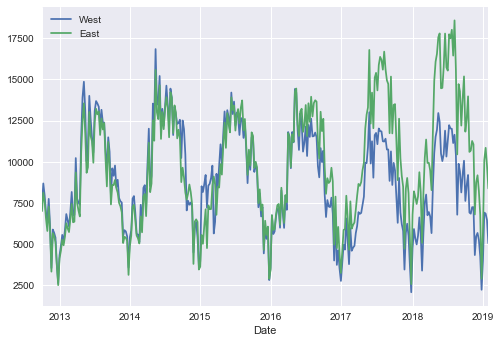

In [11]:
data.columns=['West', 'East']
data.resample('W').sum().plot();

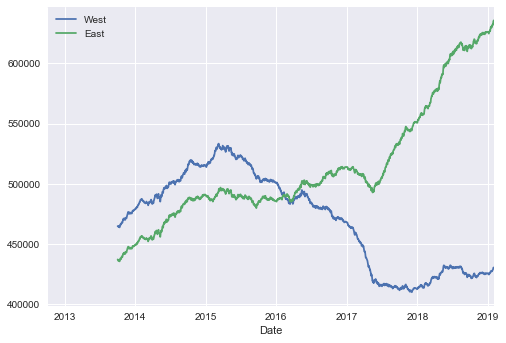

In [12]:
data.resample('D').sum().rolling(365).sum().plot();

This shows an annual trend with each point being the sum of the previous 365 days.

Adjust Y-axis to be zero-based.

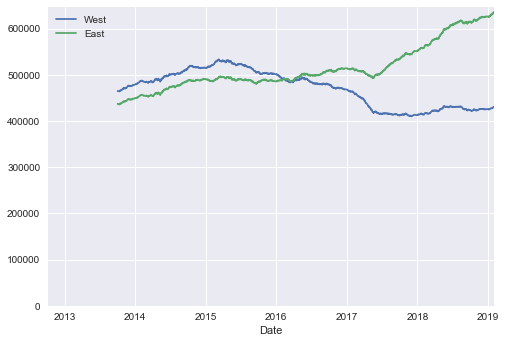

In [13]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

What does the trend in the total bike traffic look like?

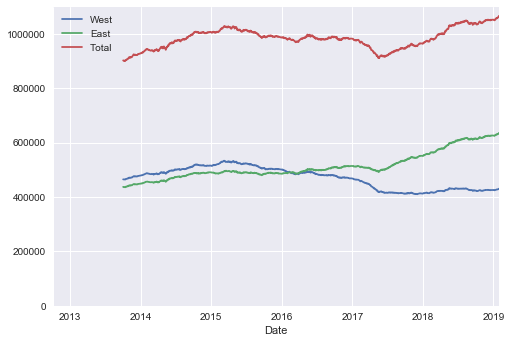

In [14]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

Now let's look at the trend within individual days.

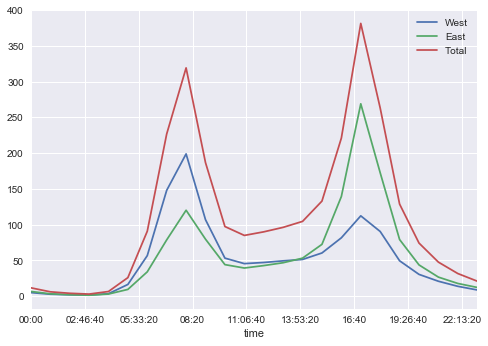

In [15]:
data.groupby(data.index.time).mean().plot();

This reveals a typical commute pattern with a westbound peak in the morning and an eastbound peak in the afternoon.

It would also be nice to see the whole dataset in this way.

In [16]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.shape

(24, 2312)

What does the first 5x5 block look like in this pivot table?

In [17]:
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


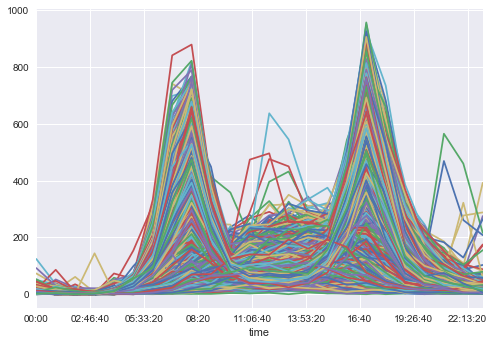

In [18]:
pivoted.plot(legend=False);

This plot has a line for each day for all of the years, so let's change the transparency of each line.

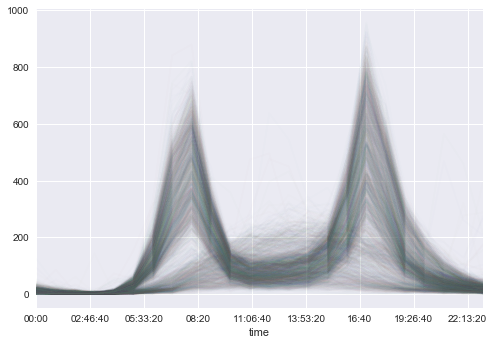

In [19]:
pivoted.plot(legend=False, alpha=0.01);

Now we see that there are days with the commute pattern and days (maybe weekends?) with more of a midday pattern.

## Part 3: Version Control with Git & GitHub

At this point, it's important to be sure that you have a Notebook that flows well before working on the next steps.

We'll be using GitHub to transform this exploratory work into something reproducible.

First, create a new repository called JupyterWorkflow, then clone it to your computer.

